<h1>Face Mask Detection Using VGG16 Network Model</h1>
<hr>

<h2>Importing required packages </h2>

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

<h2>Setting paths of dataset</h2>


In [ ]:
train_set_path = '/content/drive/MyDrive/Face Mask Dataset/Train'
test_set_path = '/content/drive/MyDrive/Face Mask Dataset/Test'
val_set_path = '/content/drive/MyDrive/Face Mask Dataset/Validation'

<h2>Image preprocessing - Data Augmentation</h2>

In [ ]:
data_gen = ImageDataGenerator(rotation_range=45, shear_range=0.2, horizontal_flip=True, vertical_flip=True, rescale=1/255.0, zoom_range=0.2, )

train_data = data_gen.flow_from_directory(train_set_path, target_size=(224,224), class_mode="categorical", color_mode="rgb", shuffle=True, batch_size = 200)

validation_data = data_gen.flow_from_directory(val_set_path, target_size=(224,224), class_mode="categorical", color_mode="rgb", shuffle=True, batch_size= 50)

Found 10020 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


<h2>Initialising Sequential model and applying layers of VGG16 network</h2>

In [ ]:
#initialising sequential model
model = Sequential() 

#initialising VGG16 network model with weights of ImageNet dataset
vgg16 = VGG16(include_top = False,weights='imagenet',input_shape=(224,224,3))

#In order to reduce the training time, I make the hidden layers of VGG16 untrainable
for layer in vgg16.layers:
  layer.trainable = False

#adding VGG16 network model in sequential model
model.add(vgg16)

#flattening the outputs of layers
model.add(Flatten())

#adding a dense layer
model.add(Dense(64,activation = 'relu',kernel_initializer="he_uniform"))

#adding a output layer
model.add(Dense(2, activation='softmax', kernel_initializer="glorot_uniform"))

#finally compiling the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

<h2>Describing the model</h2>

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1605696   
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 16,320,514
Trainable params: 1,605,826
Non-trainable params: 14,714,688
_________________________________________________________________


<h2>Fitting model with my dataset

In [ ]:
history = model.fit(train_data, validation_data=(validation_data), epochs=15)

Epoch 1/15
51/51 [==============================] - 656s 13s/step - loss: 0.7185 - accuracy: 0.8092 - val_loss: 0.1624 - val_accuracy: 0.9400
Epoch 2/15
51/51 [==============================] - 184s 4s/step - loss: 0.1154 - accuracy: 0.9607 - val_loss: 0.1048 - val_accuracy: 0.9575
Epoch 3/15
51/51 [==============================] - 183s 4s/step - loss: 0.0897 - accuracy: 0.9717 - val_loss: 0.0900 - val_accuracy: 0.9688
Epoch 4/15
51/51 [==============================] - 183s 4s/step - loss: 0.0721 - accuracy: 0.9762 - val_loss: 0.0643 - val_accuracy: 0.9787
Epoch 5/15
51/51 [==============================] - 182s 4s/step - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.0643 - val_accuracy: 0.9825
Epoch 6/15
51/51 [==============================] - 182s 4s/step - loss: 0.0555 - accuracy: 0.9814 - val_loss: 0.0677 - val_accuracy: 0.9812
Epoch 7/15
51/51 [==============================] - 183s 4s/step - loss: 0.0523 - accuracy: 0.9845 - val_loss: 0.0561 - val_accuracy: 0.9800
Epoch 8/15
5

<h2>Visualising accuracy of the trained model</h2>

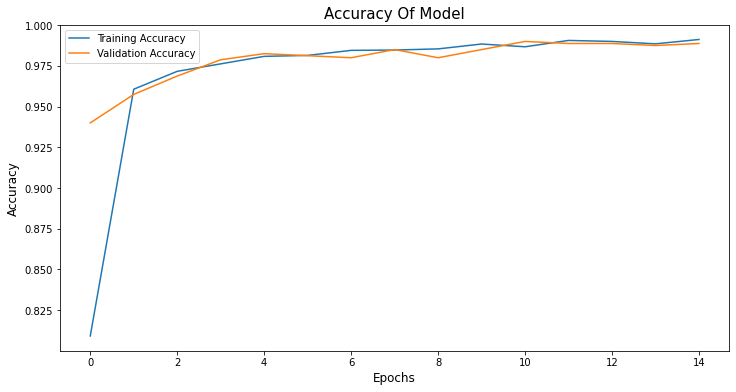

In [ ]:
import matplotlib.pyplot as plt

# accuracy of my model
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.title("Accuracy Of Model",fontsize=15)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

<h2>Preparing test data</h2>

In [ ]:
test_data = data_gen.flow_from_directory(test_set_path, target_size=(224,224), color_mode="rgb", batch_size = 50, shuffle = False, class_mode="categorical")

Found 992 images belonging to 2 classes.


In [ ]:
y_true = test_data.classes

<h2>Testing model against test data</h2>

In [ ]:
prediction = model.predict(test_data)

In [ ]:
import numpy as np

output = []
for op in prediction:
    output.append(np.argmax(op))

<h2>Evaluating model with test data</h2>

In [ ]:
model.evaluate(test_data)

20/20 [==============================] - 17s 844ms/step - loss: 0.0261 - accuracy: 0.9879


[0.02614579163491726, 0.9879032373428345]

<h2>Performing evaluation metrices on the model</h2>

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
roc_auc_score(y_true,output)

0.988930106936428

In [ ]:
precision_score(y_true,output)

0.9901574803149606

In [ ]:
recall_score(y_true,output)

0.9882121807465619

In [ ]:
f1_score(y_true,output)

0.9891838741396263

In [ ]:
confusion_matrix(y_true,output)

array([[478,   5],
       [  6, 503]])

<h2>Using model on an uploaded image for prediction</h2>

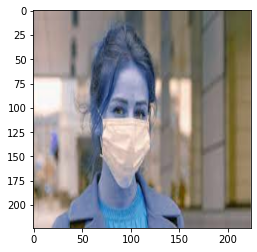

In [ ]:
import matplotlib.pyplot as plt
import cv2

def img_preprocessing(path):
    sample_mask_img = cv2.imread(path)
    sample_mask_img = cv2.resize(sample_mask_img,(224,224))
    plt.imshow(sample_mask_img)
    sample_mask_img = np.reshape(sample_mask_img,[1,224,224,3])
    sample_mask_img = sample_mask_img/255.0
    return sample_mask_img
    
img = img_preprocessing('/content/download.jpeg')

In [ ]:
np.argmax(model.predict(img))

0

<h2>Saving the model</h2>

In [ ]:
model.save("mask-detection-system.h5")